# SALES ANALYSIS SINCE SWITCHING TO JUST FOODS

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
import warnings

%matplotlib inline
pd.set_option("display.max_columns", None)
warnings.filterwarnings('ignore')

All data is coming from ECO NAV ERP System from date of inception to 5/27/2019.  Data was taken from item ledger entries and saved into a .csv

## Load in Data from Item Ledger Entries

In [24]:
df = pd.read_csv('C:\\Users\\ECO\\Desktop\\Data_analysis\\data\\item_ledger.csv')

## Examine Data

In [31]:
df.head(2)

,Posting Date,Entry Type,Document Type,Document No.,Item No.,Description,Expiration Date,Lot No.,Location Code,Quantity,Invoiced Quantity,Remaining Quantity,Net Weight,Quantity (Source UOM),Sales Amount (Actual),Cost Amount (Actual),Cost Amount (Non-Invtbl.),Open,Order Type,Entry No.,Item Category Code
0,5/23/2019,Sale,Sales Shipment,SHP103339,01-11-019-OG,"OG Mixed Heirloom Tomatoes, 10 lb...",5/20/2020,G-WO-140,DURHAM,-5,-5,0,0,-5,165,-130,0,No,,6267,TOMATOES
1,5/23/2019,Sale,Sales Shipment,SHP103339,01-11-031-OG,"OG Red Grape Tomatoes, 12 ct...",5/22/2020,G-WJ-142,DURHAM,-4,-4,0,0,-4,120,-86,0,No,,6266,TOMATOES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 24 columns):
Posting Date                 6267 non-null object
Entry Type                   6267 non-null object
Document Type                6267 non-null object
Document No.                 6267 non-null object
Item No.                     6267 non-null object
Description                  6267 non-null object
Brand Code                   0 non-null float64
Production Date              0 non-null float64
Expiration Date              6011 non-null object
Lot No.                      6222 non-null object
Location Code                6267 non-null object
Quantity                     6267 non-null object
Invoiced Quantity            6267 non-null object
Remaining Quantity           6267 non-null object
Net Weight                   6267 non-null object
Quantity (Source UOM)        6267 non-null object
Sales Amount (Actual)        6267 non-null object
Cost Amount (Actual)         6267 non-null obje

## Clean Data

In [25]:
#removing columns with no values
df.drop(columns=['Product Group Code', 'Brand Code', 'Production Date'], inplace=True)

In [27]:
#filter only sales
df_sales = df[df['Entry Type'] == 'Sale']

In [7]:
#look at unique values in sales
df_sales['Document Type'].unique()

array(['Sales Shipment', 'Sales Return Receipt'], dtype=object)

# SALES BY CATEGORY

In [37]:
df_sales['Item Category Code'].unique()

array(['TOMATOES', 'SWEET POTATOES', 'ONIONS', 'KALES', 'CABBAGE',
       'BROCCOLI', 'BERRIES', 'GROCERY KOMBUCHA', 'RADISHES', 'OIL',
       'TURNIPS', 'TURMERIC', 'SPINACH', 'CUCUMBERS', 'LETTUCE', 'BEETS',
       'GROCERY CHEESE', 'COLLARDS', 'SALAD MIX', 'GROCERY SORGHUM',
       'HARD SQUASH', 'GROC FLOUR GRAINS', 'GROCERY FERMENTED', 'SQUASH',
       'NUTS', 'MUSHROOMS', 'GROCERY HONEY', 'HERBS', 'GROCERY MUSTARD',
       'GLASSWARE', 'CHARD', 'BOK CHOI', 'ASPARAGUS', 'MUSTARD',
       'ARUGULA', 'GROC JELLIES JAM', 'PEAS', nan, 'BAMBOO', 'RAMPS',
       'PARSNIPS', 'KOHLRABI', 'PACKAGING'], dtype=object)

## Top Sales Categories by the case

In [40]:
df_cat_count = df_sales.groupby('Item Category Code')['Quantity'].count().sort_values(ascending=False)
df_cat_count

Item Category Code
SWEET POTATOES       676
KALES                430
GROCERY KOMBUCHA     402
BERRIES              327
LETTUCE              286
TOMATOES             280
GROCERY CHEESE       252
BEETS                252
ONIONS               219
CABBAGE              192
COLLARDS             187
RADISHES             155
CHARD                141
MUSHROOMS            126
GROC FLOUR GRAINS    107
TURMERIC              81
MUSTARD               72
TURNIPS               68
OIL                   64
CUCUMBERS             40
BROCCOLI              38
ASPARAGUS             34
GROCERY SORGHUM       29
GROCERY MUSTARD       29
HERBS                 28
GROCERY HONEY         27
RAMPS                 19
SQUASH                19
ARUGULA               18
GROC JELLIES JAM      18
GROCERY FERMENTED     17
PEAS                  15
PARSNIPS              14
SALAD MIX             14
HARD SQUASH           10
KOHLRABI               8
NUTS                   8
SPINACH                5
GLASSWARE              4
PACKAG

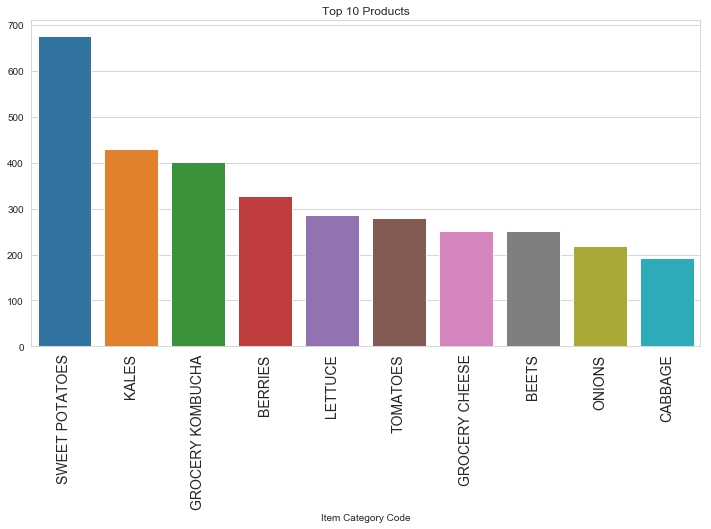

In [90]:
sn.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.rc('xtick', labelsize=14)
plt.xticks(rotation=90)
plt.title('Top 10 Products')
sn.barplot(df_cat_count.index[:10], df_cat_count.values[:10]);

### Sweet Potatoes

In [38]:
# Convert date column into datetime object to do time series analysis
def convert_date(row):
    date_format = '%m/%d/%Y'
    val = datetime.strptime(row['Posting Date'], date_format)
    return val

In [55]:
swt_pot_df = df_sales[df_sales['Item Category Code'] == 'SWEET POTATOES']
swt_pot_df['Posting Date'] = swt_pot_df.apply(convert_date, axis=1)

In [75]:
#swt_pot_df.info()

In [74]:
#Rows organized by week
df_swt_by_year = swt_pot_df.resample('W', on='Posting Date').count()
#df_swt_by_year

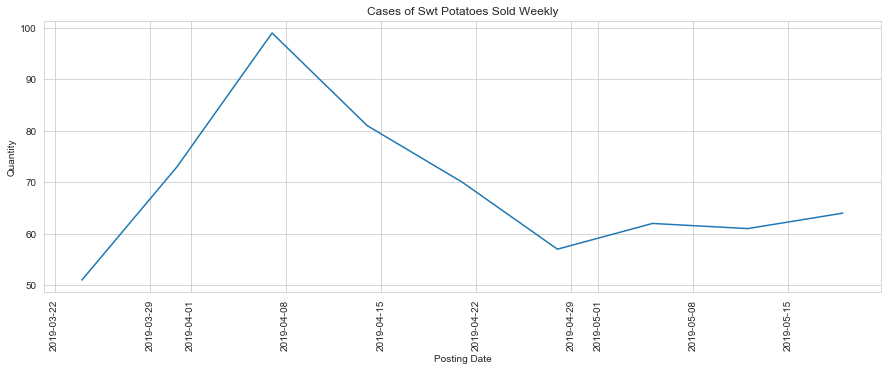

In [77]:
sn.set_style("whitegrid")
plt.figure(figsize=(15, 5))
plt.rc('xtick', labelsize=10)
plt.xticks(rotation=90)
plt.title('Cases of Swt Potatoes Sold Weekly')
sn.lineplot(df_swt_by_year.index[:-1], df_swt_by_year['Quantity'][:-1]);

In [85]:
df_swt_types = swt_pot_df.groupby('Description')['Quantity'].count().sort_values(ascending=False)[:7]
df_swt_types

Description
OG Covington Sweet Potatoes, 40 lb              270
OG Garnet Sweet Potatoes, 40 lb...              194
OG Covington Sweet Potatoes, JUMBO, 40 lb...     74
Non-Cert. Murasaki Sweet Potato, 40 lb.          64
OG Sweetgreen Sweet Potato Mix, 40 lb.           34
OG Mahon Yam Sweet Potato, 40 lb.                11
OG Purple Sweet Potatoes, 40 lb...               10
Name: Quantity, dtype: int64

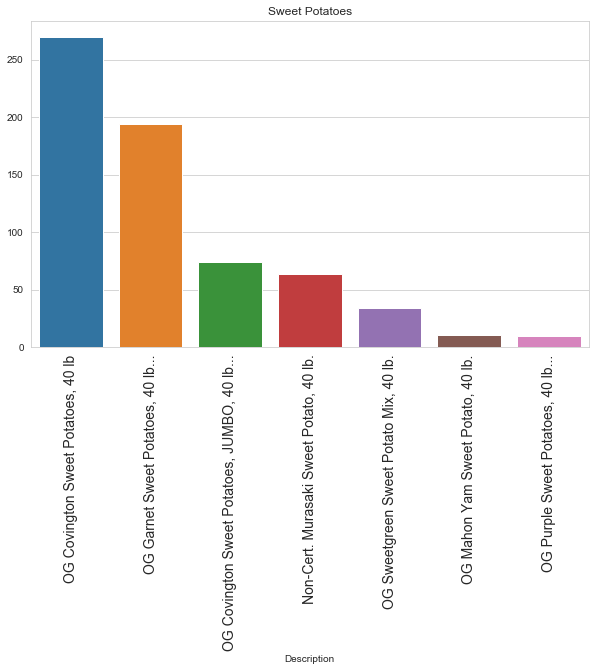

In [89]:
sn.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.rc('xtick', labelsize=14)
plt.xticks(rotation=90)
plt.title('Sweet Potatoes')
sn.barplot(df_swt_types.index, df_swt_types.values);